In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from pandas import DataFrame


In [ ]:
#Importar dos dados 

from google.colab import files
uploaded = files.upload()

Saving pedidos.csv to pedidos.csv


In [ ]:
df = pd.read_csv("pedidos.csv", sep=';')
df.head()

,C7_FILIAL,C7_NUM,C7_TOTAL,Unnamed: 3
0,1010004,4,1850.0,NaN
1,1010005,8,3432.0,NaN
2,4010001,14,6.9,NaN
3,4010001,14,12.0,NaN
4,4010001,14,17.5,NaN


In [ ]:
df = df[['C7_FILIAL', 'C7_NUM', 'C7_TOTAL']]
df.head()

,C7_FILIAL,C7_NUM,C7_TOTAL
0,1010004,4,1850.0
1,1010005,8,3432.0
2,4010001,14,6.9
3,4010001,14,12.0
4,4010001,14,17.5


In [ ]:
df2 = df.groupby('C7_NUM').sum()
df2.head()

,C7_FILIAL,C7_TOTAL
C7_NUM,,
1,6030003,117.9
2,3010001,119.4
4,1010004,1850.0
8,1010005,3432.0
11,6060024,352.8


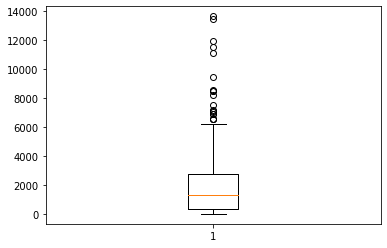

In [ ]:
plt.boxplot(df2['C7_TOTAL']);
plt.show()

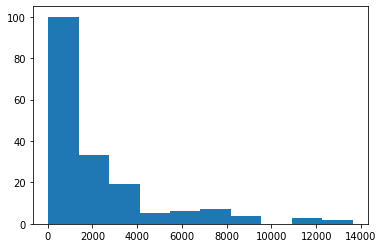

In [ ]:
plt.hist(df2['C7_TOTAL'], bins=10);
plt.show()

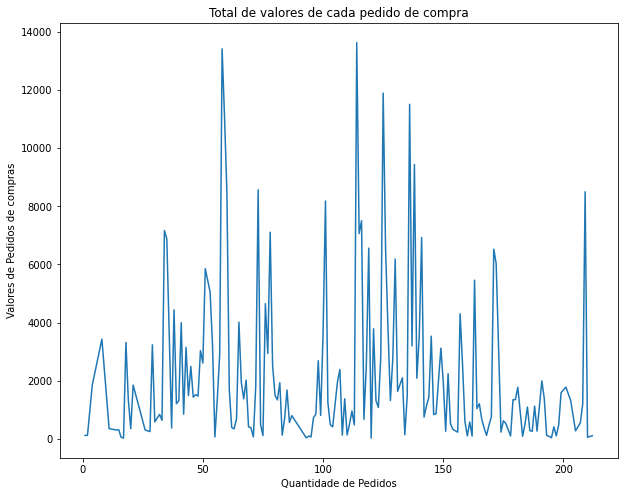

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(df2['C7_TOTAL'])
plt.ylabel("Valores de Pedidos de compras")
plt.xlabel("Quantidade de Pedidos")
plt.title('Total de valores de cada pedido de compra')
plt.show()

In [ ]:
df2 = df.groupby(['C7_NUM']).sum()
df2.head()

,C7_FILIAL,C7_TOTAL
C7_NUM,,
1,6030003,117.9
2,3010001,119.4
4,1010004,1850.0
8,1010005,3432.0
11,6060024,352.8


In [ ]:
#quant: 54
classe500 =  df2.query("C7_TOTAL <= 500").count()
print(classe500)

C7_FILIAL    54
C7_TOTAL     54
dtype: int64


In [ ]:
#quant: 26
classe1000 = df2.query("C7_TOTAL >= 500 & C7_TOTAL <= 1000").count()
print(classe1000)

C7_FILIAL    26
C7_TOTAL     26
dtype: int64


In [ ]:
#quant: 75
classe5000 = df2.query("C7_TOTAL >= 1001 & C7_TOTAL <= 5000").count()
print(classe5000)

C7_FILIAL    75
C7_TOTAL     75
dtype: int64


In [ ]:
#quant: 19
classe10000 = df2.query("C7_TOTAL >= 5001 & C7_TOTAL <= 10000").count()
print(classe1000)

C7_FILIAL    26
C7_TOTAL     26
dtype: int64


In [ ]:
#quant: 5
classe15000 = df2.query("C7_TOTAL >= 10001 & C7_TOTAL <= 15000").count()
print(classe15000)

In [ ]:
#Total 179
soma = df2['C7_TOTAL'].sum()
quant = df2['C7_TOTAL'].count()

In [ ]:
df3 = df2.copy()
df3.head()

,C7_FILIAL,C7_TOTAL
C7_NUM,,
1,6030003,117.9
2,3010001,119.4
4,1010004,1850.0
8,1010005,3432.0
11,6060024,352.8


In [ ]:
df3.drop(['MEDIA'], axis = 1, inplace=True)
df3.head()

,C7_FILIAL,C7_TOTAL,FREQ_RELATIVA
C7_NUM,,,
1,6030003,117.9,0.000301
2,3010001,119.4,0.000305
4,1010004,1850.0,0.004729
8,1010005,3432.0,0.008773
11,6060024,352.8,0.000902


In [ ]:
df3['FREQ_RELATIVA'] = df2.apply(func = lambda r: (r.C7_TOTAL) / soma * 100, axis = 1)
df3.head()

,C7_FILIAL,C7_TOTAL,FREQ_RELATIVA
C7_NUM,,,
120,8020002,28.40,0.007260
17,24060006,29.59,0.007564
93,1010004,36.50,0.009330
195,12030003,36.56,0.009346
16,20050005,51.57,0.013183


In [ ]:
df3.sort_values(by = ["C7_TOTAL"], ascending = True, inplace= True)

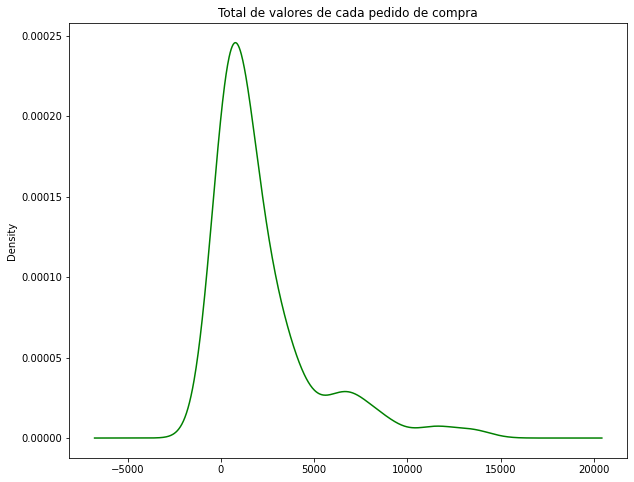

In [ ]:
plt.figure(figsize=(10, 8))
df3["C7_TOTAL"].plot.density(color = "green")
plt.title('Total de valores de cada pedido de compra')
plt.show()

In [ ]:
print('Faixas de aprovação Andre = 0 a 5000')
print('Faixas de aprovação Waldir = 5000 a 20000')

Faixas de aprovação Andre = 0 a 5000
Faixas de aprovação Waldir = 5000 a 20000
